--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, metric='cosine', n_iter=3000, n_jobs=-1,
     random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using exact search using cosine distance...
   --> Time elapsed: 0.04 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.03 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=56.00 for 250 iterations...
Iteration   50, KL divergence 1.8309, 50 iterations in 20.3443 sec
Iteration  100, KL divergence 1.9263, 50 iterations in 22.9949 sec
Iteration  150, KL divergence 1.9419, 50 iterations in 21.6813 sec
Iteration  200, KL divergence 1.9415, 50 iterations in 21.2487 sec
Iteration  250, KL divergence 1.9413, 50 iterations in 16.3296 sec
   --> Time elapsed: 102.60 seconds
===> Running optimi

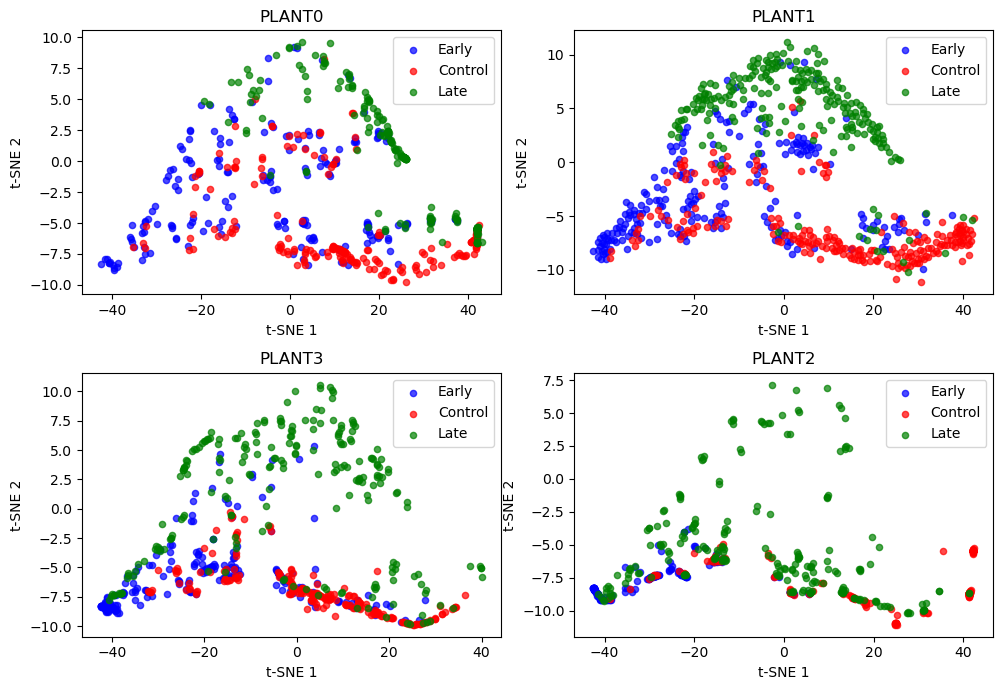

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from openTSNE import TSNE
from sklearn.preprocessing import MinMaxScaler

#Change the path to your dataset
base_path = "C:/Users/halhajali/OneDrive - Fondazione Istituto Italiano Tecnologia/Desktop/IIT-UNIBZ/Dataset/Water-Stress/"
conditions = ['Early', 'Control', 'Late']
plants = ['plant0', 'plant1', 'plant3', 'plant2']
condition_colors = {'Early': 'blue', 'Control': 'red', 'Late': 'green'}
indices = [0,3,1]
# --- Data Loading Function ---
def load_data():
    all_data, all_labels, all_ids = [], [], []
    for condition in conditions:
        for plant in plants:
            path = os.path.join(base_path, condition, plant)
            if not os.path.exists(path):
                continue
            for file in os.listdir(path):
                if file.endswith('.csv'):
                    df = pd.read_csv(os.path.join(path, file), header=None)
                    values = np.array(df).take(indices, axis=0)[:, [3, 4]]
                    values = values.flatten()
                    all_data.append(values)
                    all_labels.append(condition)
                    all_ids.append(plant)
    return np.vstack(all_data), np.array(all_labels), np.array(all_ids)

# load and normalize data
data, labels, plant_ids = load_data()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

plant_data = {p: scaled_data[plant_ids == p] for p in plants}
plant_labels = {p: labels[plant_ids == p] for p in plants}

# Tsne initiallization 
tsne = TSNE(
    perplexity= 30, ### It is recommended to use 30, otherwise the data points will not be well distributed 
    learning_rate= 'auto',
    metric = 'cosine',
    n_jobs=-1,
    n_iter=3000,
    random_state=42,
    initialization='pca',
    verbose = True
)

# figure
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs = axs.ravel()

# Fit on Plant1 first (reference plant with the highest accuracy)
reference_embedding = tsne.fit(plant_data['plant1'])
print("----------------")
print("Fitting on Plant1 finished")
print("----------------")
for i, plant in enumerate(plants):
    ax = axs[i]
    
    # For Plant1 (already fitted)
    if plant == 'plant1':
        embedding = reference_embedding
    # For other plants (transform)
    else:
        embedding = reference_embedding.transform(plant_data[plant])
    
    # Plot each condition
    for cond in conditions:
        mask = plant_labels[plant] == cond
        ax.scatter(
            embedding[mask, 0],
            embedding[mask, 1],
            s=20,
            alpha=0.7,
            color=condition_colors[cond],
            label=f'{cond}'
        )
    
    ax.set_title(f'{plant.upper()}')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    # ax.set_xlim(-30,30 )
    # ax.set_ylim(-5,5)
    # if i == 0:  
    ax.legend()

plt.tight_layout()
plt.show()